In [1]:
# Import relevant modules

%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import corner
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
from NPTFit import nptfit # module for performing scan
from NPTFit import create_mask as cm # module for creating the mask
from NPTFit import psf_correction as pc # module for determining the PSF correction
from NPTFit import dnds_analysis # module for analysing the output

ImportError: No module named 'NPTFit'

In [2]:
n = nptfit.NPTF(tag='flux_temp')

In [4]:
fake_data = np.load('../data/fake_data_blazars.npy')
fake_exposure = np.ones(len(fake_data))
n.load_data(fake_data,fake_exposure)
#fermi_data = np.load('../fermi_data/fermidata_counts.npy')
#fermi_exposure = np.load('../fermi_data/fermidata_exposure.npy')
#n.load_data(fermi_data, fermi_exposure)

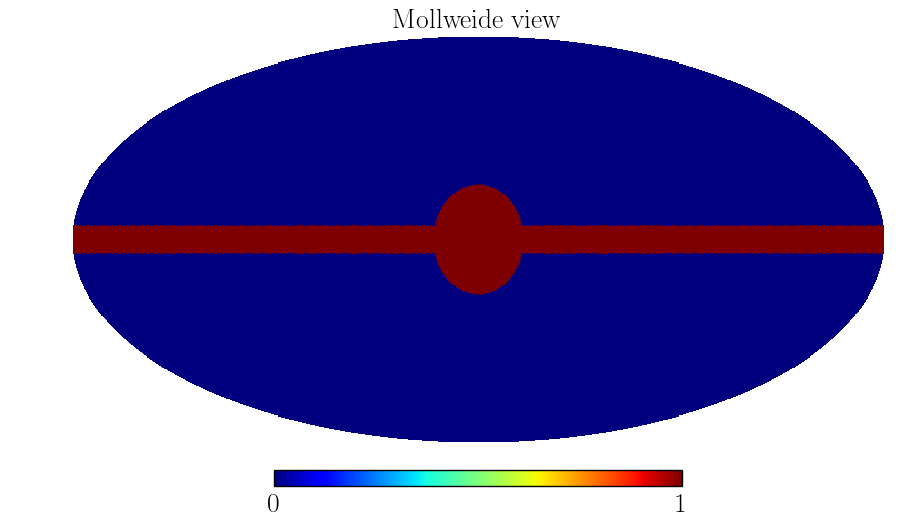

In [5]:
import healpy as hp

analysis_mask = cm.make_mask_total(mask_ring = True, inner = 20, outer = 180, ring_b = 0, ring_l = 0,band_mask = True, band_mask_range = 5)
hp.mollview(analysis_mask)
n.load_mask(analysis_mask)

In [6]:
dif = np.load('../fermi_data/template_dif.npy')
iso = np.load('../fermi_data/template_iso.npy')
bub = np.load('../fermi_data/template_bub.npy')
psc = np.load('../fermi_data/template_psc.npy')
nfw = np.load('../data/template_nfw_sources.npy')

n.add_template(iso,'iso')
n.add_template(dif, 'dif')
n.add_template(bub,'bub')
n.add_template(psc,'psc')
n.add_template(nfw,'nfw')

In [7]:
n.add_poiss_model('iso','$A_\mathrm{iso}$',[0,2],False)
n.add_poiss_model('dif','$A_\mathrm{dif}$',[10,20],False)

In [8]:
n.add_non_poiss_model('nfw',
                      ['$A^\mathrm{ps}_\mathrm{nfw}$','$n_1$','$n_2$','$S_b$'],
                      [[-6,1],[2.05,30],[-5,1.95],[np.log10(10),np.log10(500)]],
                      [True,False,False,True])
n.add_non_poiss_model('iso',
                      ['$A^\mathrm{ps}_\mathrm{iso}$','$n_1$','$n_2$','$S_b$'],
                      [[-6,1],[2.05,30],[-5,1.95],[np.log10(1),np.log10(500)]],
                      [True,False,False,True])

In [12]:
pc_inst = pc.PSFCorrection(psf_sigma_deg=0.1812)
f_ary = pc_inst.f_ary
df_rho_div_f_ary = pc_inst.df_rho_div_f_ary

n.configure_for_scan(f_ary=f_ary, df_rho_div_f_ary=df_rho_div_f_ary, nexp=1)

Loading the psf correction from: /group/hepheno/ljchang/Fermi-Subhalos-NPTF/notebooks/psf_dir/gauss_128_0.181_10_50000_1000_0.01.npy
The number of parameters to be fit is 10


In [9]:
n.perform_scan(nlive=250)